## Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
inputData = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
inputData

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
inputData.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
inputData.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
inputData.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [8]:
inputData.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
inputData['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

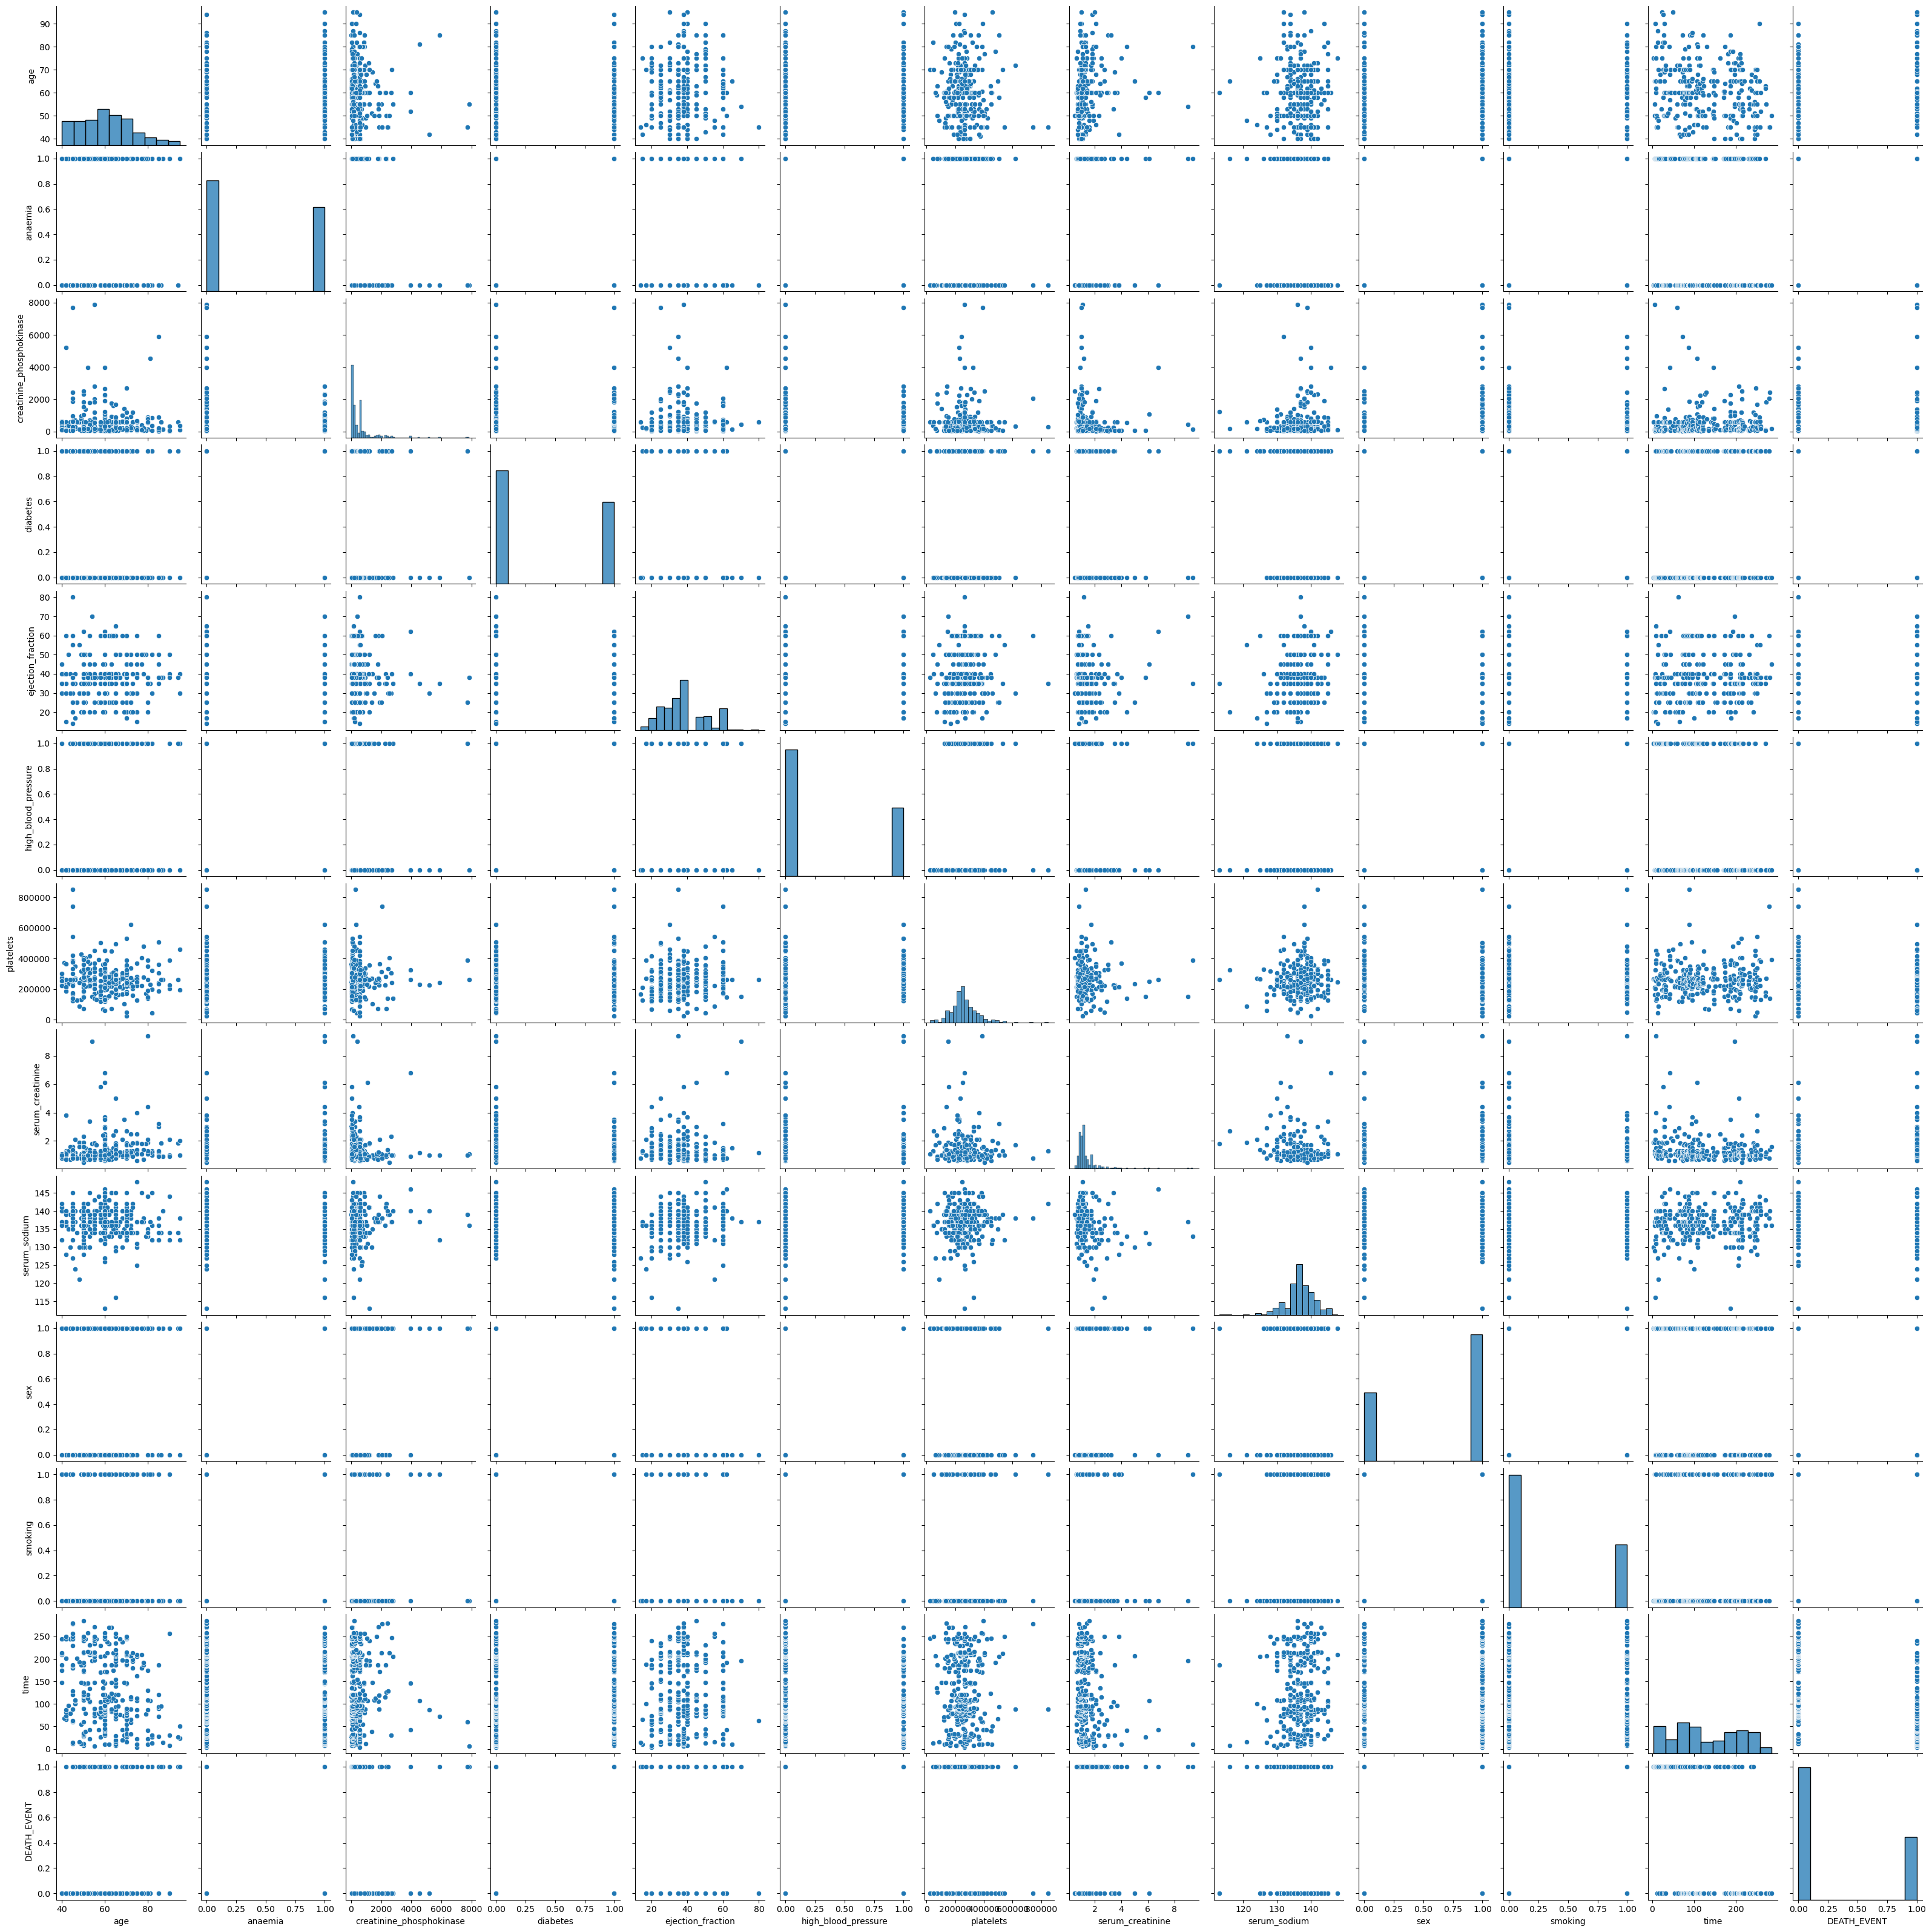

In [10]:
sns.pairplot(inputData)

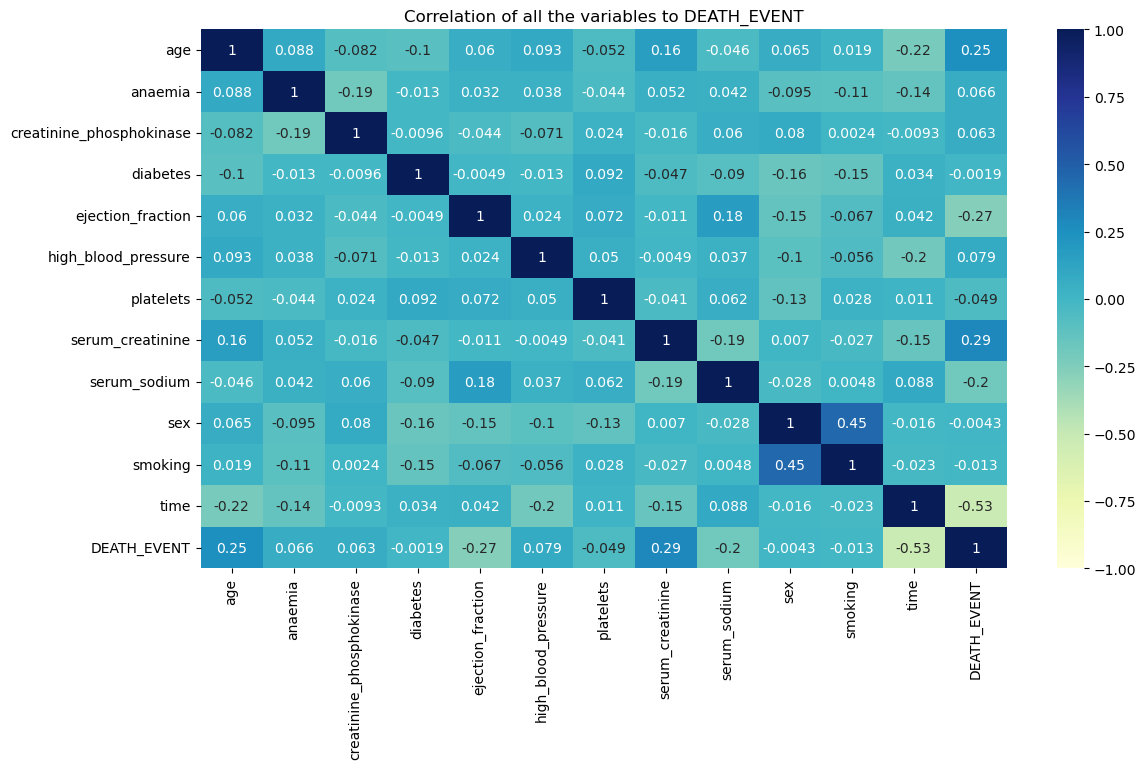

In [11]:
plt.figure(figsize=(13,7))
sns.heatmap(inputData.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title("Correlation of all the variables to DEATH_EVENT", fontsize = 12)
plt.show()

## Data Visualizations

In [12]:
CategoricalData = inputData[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
ContinuousData = inputData[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]

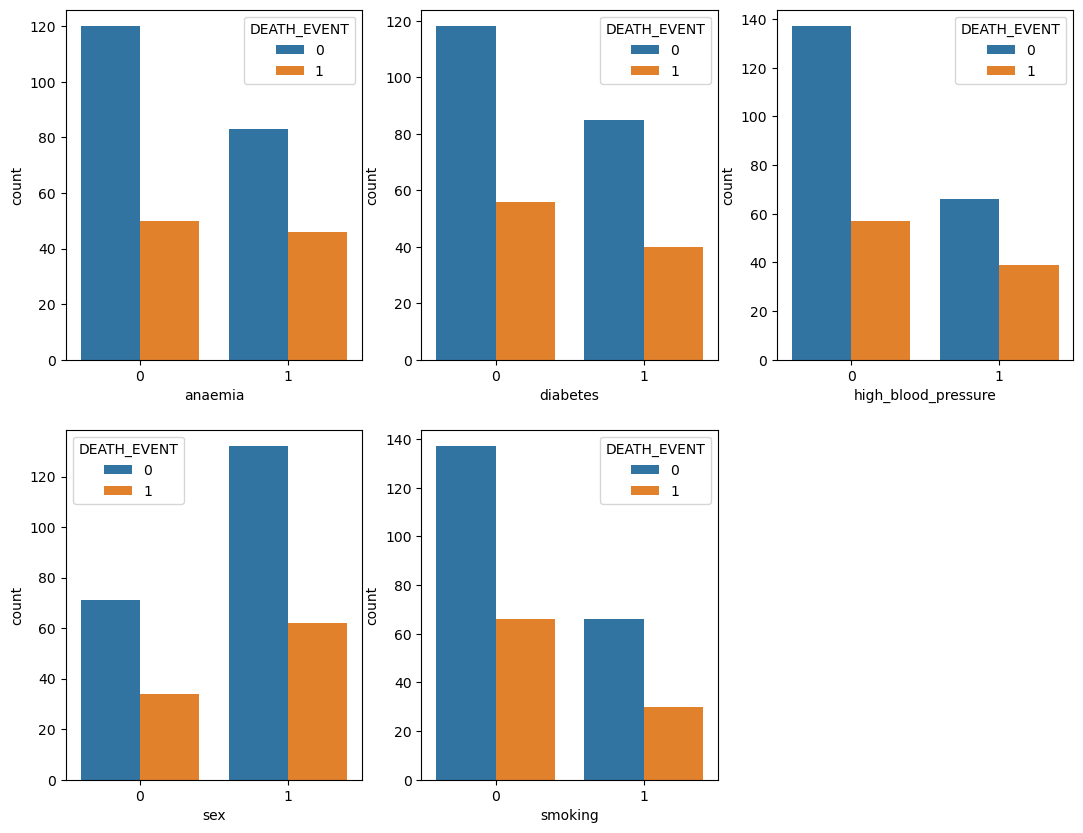

In [13]:
#Visaualizing impact of Categorical data on death
plt.figure(figsize=(13,10))
for i,cat in enumerate(CategoricalData):
    plt.subplot(2,3,i+1)
    sns.countplot(data = inputData, x= cat, hue = "DEATH_EVENT")
plt.show()

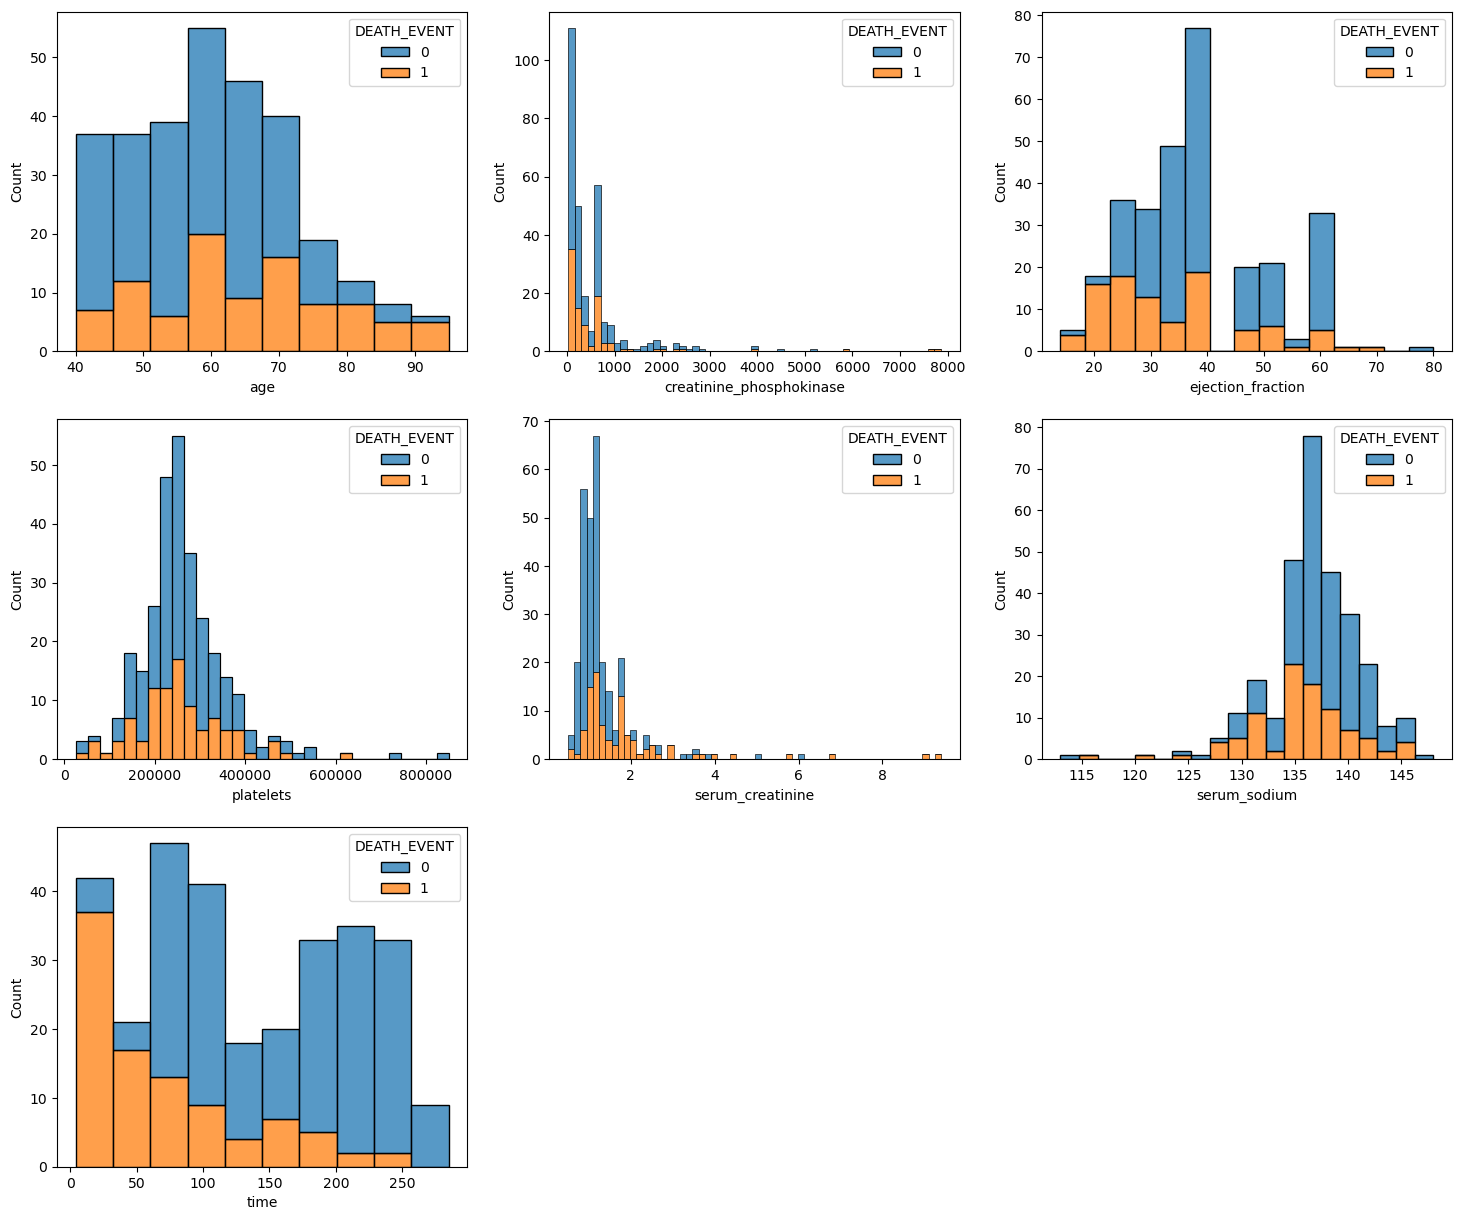

In [14]:
#Effect of continuous data on death.
plt.figure(figsize=(18,15))
for j,cont in enumerate(ContinuousData):
    plt.subplot(3,3,j+1)
    sns.histplot(data = inputData, x= cont, hue = "DEATH_EVENT", multiple="stack")
plt.show()

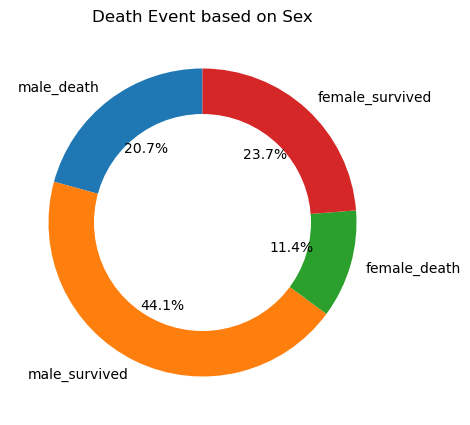

In [15]:
# Visualizing death event based on sex

male = inputData[inputData["sex"]==1]
female = inputData[inputData["sex"]==0]

male_death = male[male["DEATH_EVENT"]==1]
male_survived = male[male["DEATH_EVENT"]==0]
female_death = female[female["DEATH_EVENT"]==1]
female_survived = female[female["DEATH_EVENT"]==0]

sexData = [len(male_death), len(male_survived), len(female_death),len(female_survived)]
sexLabels = ["male_death","male_survived","female_death","female_survived"]

plt.figure(figsize=(5,5))
plt.pie(sexData, labels = sexLabels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Death Event based on Sex", fontsize=12)
plt.show()

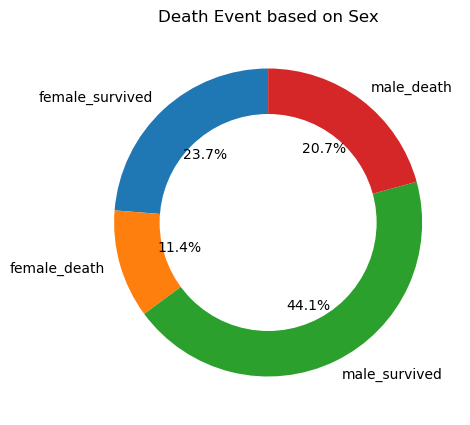

In [16]:
#ALternative method Visualizing deaths based on Sex
sexData= inputData.groupby(['sex', 'DEATH_EVENT']).size()
sexLabels = ["female_survived","female_death", "male_survived","male_death"]

plt.figure(figsize=(5,5))
plt.pie(sexData, labels = sexLabels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Death Event based on Sex", fontsize=12)
plt.show()

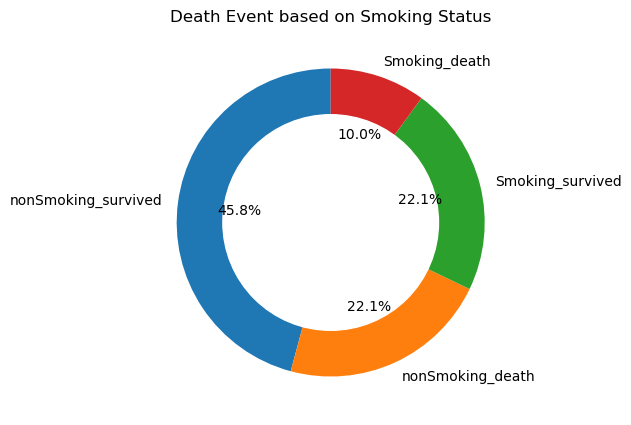

In [17]:
#Visualizing deaths based on Smoking status
smokingData= inputData.groupby(['smoking', 'DEATH_EVENT']).size()
smokingLabels = ["nonSmoking_survived","nonSmoking_death", "Smoking_survived","Smoking_death"]

plt.figure(figsize=(5,5))
plt.pie(smokingData, labels = smokingLabels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Death Event based on Smoking Status", fontsize=12)
plt.show()

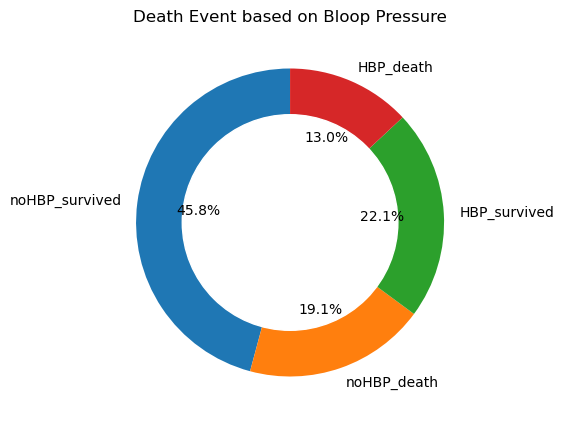

In [18]:
#Visualizing deaths based on Blood Pressure
hbp= inputData.groupby(['high_blood_pressure', 'DEATH_EVENT']).size()
HBPLabels = ["noHBP_survived","noHBP_death", "HBP_survived","HBP_death"]

plt.figure(figsize=(5,5))
plt.pie(hbp, labels = HBPLabels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Death Event based on Bloop Pressure", fontsize=12)
plt.show()

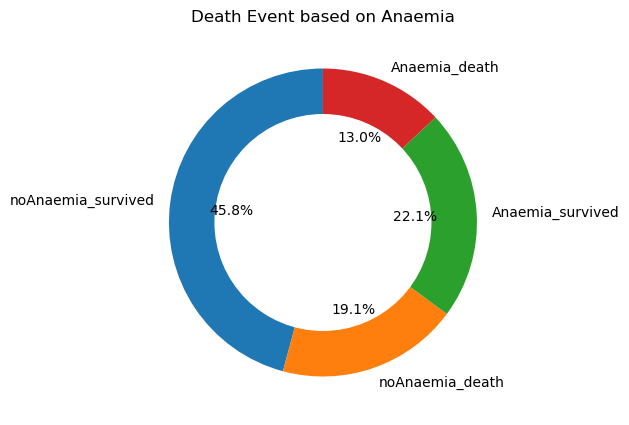

In [19]:
#Visualizing deaths based on Blood Pressure
Anaemia= inputData.groupby(['anaemia', 'DEATH_EVENT']).size()
AnaemiaLabels = ["noAnaemia_survived","noAnaemia_death", "Anaemia_survived","Anaemia_death"]

plt.figure(figsize=(5,5))
plt.pie(hbp, labels = AnaemiaLabels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Death Event based on Anaemia", fontsize=12)
plt.show()

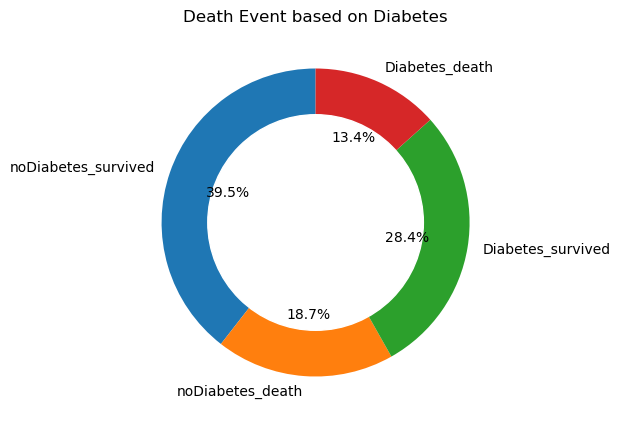

In [20]:
#Visualizing deaths based on Diabetes
Diabetes= inputData.groupby(['diabetes', 'DEATH_EVENT']).size()
DiabetesLabels = ["noDiabetes_survived","noDiabetes_death", "Diabetes_survived","Diabetes_death"]

plt.figure(figsize=(5,5))
plt.pie(Diabetes, labels = DiabetesLabels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Death Event based on Diabetes", fontsize=12)
plt.show()

## ML Data modelling

In [21]:
x = inputData.drop(['DEATH_EVENT'], axis = 1)
y = inputData['DEATH_EVENT']

In [22]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [24]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [25]:
# Standardizing the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
# Creating a list to save all the models for comparism
accuracyList = [] 

### 1. Decision Tree Classifier

In [27]:
#Fittingn the model
DecisionTree_Model = DecisionTreeClassifier(criterion = 'entropy', random_state = 2)
DecisionTree_Model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [28]:
#Predicting the test result
DT_Model_Predict = DecisionTree_Model.predict(x_test_scaled)

In [29]:
#Evaluating the model's performance
from sklearn import metrics
acc = metrics.accuracy_score(y_test, DT_Model_Predict)
print('accuracy:%2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, DT_Model_Predict)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-----------------------------')
result = metrics.classification_report(y_test, DT_Model_Predict)
print('Classification Report:\n')
print(result)

accuracy:0.800000


Confusion Matrix:
[[57  9]
 [ 9 15]] 


-----------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        66
           1       0.62      0.62      0.62        24

    accuracy                           0.80        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.80      0.80      0.80        90



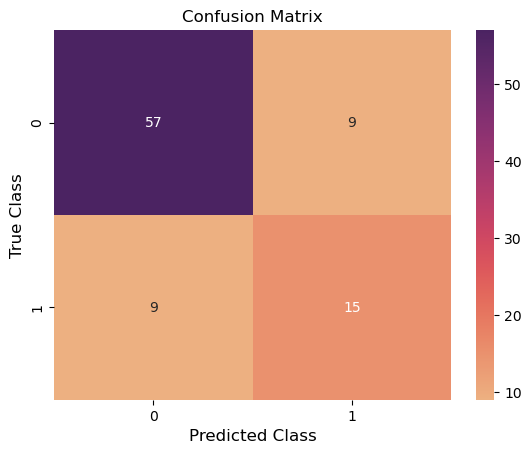

In [30]:
#Heat map visualization
ax =sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)

plt.show()

In [31]:
accuracyList.append((acc)*100)

In [32]:
accuracyList

[80.0]

### 2. Logistic Regression Model

In [33]:
LRModel = LogisticRegression()
LRModel.fit(x_train_scaled, y_train)  #fitting the model
LRModel_Prediction = LRModel.predict(x_test_scaled) #predicting the result of the model

In [34]:
#Evaluating the model's performance
from sklearn import metrics
LR_Accuracy = metrics.accuracy_score(y_test, LRModel_Prediction)
print('accuracy:%2f\n\n'%(LR_Accuracy))
LRcm = metrics.confusion_matrix(y_test, LRModel_Prediction)
print('Confusion Matrix:')
print(LRcm,'\n\n')
print('-----------------------------')
result1 = metrics.classification_report(y_test, LRModel_Prediction)
print('Classification Report:\n')
print(result1)

accuracy:0.877778


Confusion Matrix:
[[61  5]
 [ 6 18]] 


-----------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        66
           1       0.78      0.75      0.77        24

    accuracy                           0.88        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.88      0.88      0.88        90



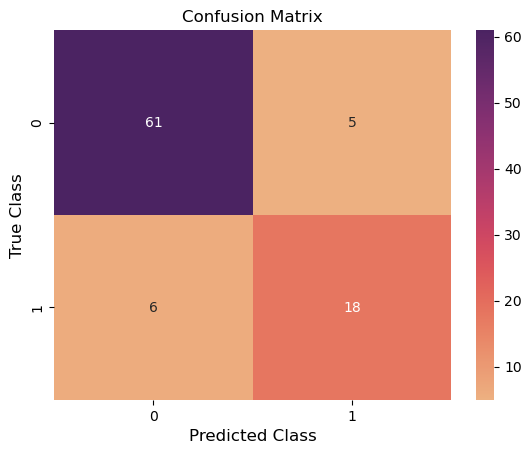

In [35]:
#Heat map visualization
a =sns.heatmap(LRcm, cmap='flare',annot=True, fmt='d')

plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)

plt.show()

In [36]:
# Appending the accuracy score to the accuracy list
accuracyList.append((LR_Accuracy)*100)

### 3. Naive Bays Model

In [37]:
NB_Model = GaussianNB()
NB_Model.fit(x_train_scaled, y_train) # fitting the model
NB_Predict = NB_Model.predict(x_test_scaled) # predicting the performance of the model

In [38]:
#Evaluating the model's performance
from sklearn import metrics
NB_Accuracy = metrics.accuracy_score(y_test, NB_Predict)
print('accuracy:%2f\n\n'%(NB_Accuracy))
NBcm = metrics.confusion_matrix(y_test, NB_Predict)
print('Confusion Matrix:')
print(NBcm,'\n\n')
print('-----------------------------')
result2 = metrics.classification_report(y_test, NB_Predict)
print('Classification Report:\n')
print(result2)

accuracy:0.800000


Confusion Matrix:
[[60  6]
 [12 12]] 


-----------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        66
           1       0.67      0.50      0.57        24

    accuracy                           0.80        90
   macro avg       0.75      0.70      0.72        90
weighted avg       0.79      0.80      0.79        90



In [39]:
#Appending the accuracy to the accuracy list
accuracyList.append((NB_Accuracy)*100)

### 4. Random Forest Classifier

In [40]:
RF_Model = RandomForestClassifier()
RF_Model.fit(x_train_scaled, y_train) #fitting the model
RF_Predict = RF_Model.predict(x_test_scaled) # predicting the model

In [41]:
#Evaluating the model's performance
from sklearn import metrics
RF_Accuracy = metrics.accuracy_score(y_test, RF_Predict)
print('accuracy:%2f\n\n'%(RF_Accuracy))
RFcm = metrics.confusion_matrix(y_test, RF_Predict)
print('Confusion Matrix:')
print(RFcm,'\n\n')
print('-----------------------------')
result3 = metrics.classification_report(y_test, RF_Predict)
print('Classification Report:\n')
print(result3)

accuracy:0.911111


Confusion Matrix:
[[62  4]
 [ 4 20]] 


-----------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.83      0.83      0.83        24

    accuracy                           0.91        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.91      0.91      0.91        90



In [42]:
#Appending the accuracy to the accuracy list
accuracyList.append((RF_Accuracy)*100)

In [43]:
accuracyList

[80.0, 87.77777777777777, 80.0, 91.11111111111111]

### 5. Support Vector Machine

In [44]:
SVM_Model = SVC()
SVM_Model.fit(x_train_scaled, y_train) # fitting the model
SVM_Predict = SVM_Model.predict(x_test_scaled) # predicting the model

In [45]:
#Evaluating the model's performance
from sklearn import metrics
SVM_Accuracy = metrics.accuracy_score(y_test, SVM_Predict)
print('accuracy:%2f\n\n'%(SVM_Accuracy))
SVMcm = metrics.confusion_matrix(y_test, SVM_Predict)
print('Confusion Matrix:')
print(SVMcm,'\n\n')
print('-----------------------------')
result4 = metrics.classification_report(y_test, SVM_Predict)
print('Classification Report:\n')
print(result4)

accuracy:0.855556


Confusion Matrix:
[[61  5]
 [ 8 16]] 


-----------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        66
           1       0.76      0.67      0.71        24

    accuracy                           0.86        90
   macro avg       0.82      0.80      0.81        90
weighted avg       0.85      0.86      0.85        90



In [46]:
#Appending the accuracy to the accuracy list
accuracyList.append((SVM_Accuracy)*100)

In [47]:
print('Accuracy List:\n')
accuracyList


Accuracy List:



[80.0, 87.77777777777777, 80.0, 91.11111111111111, 85.55555555555556]

In [48]:
ModelsList = ["Decision Tree", "Logistic Regression", "Naive Bayes", "Random Forest", "SVC"]

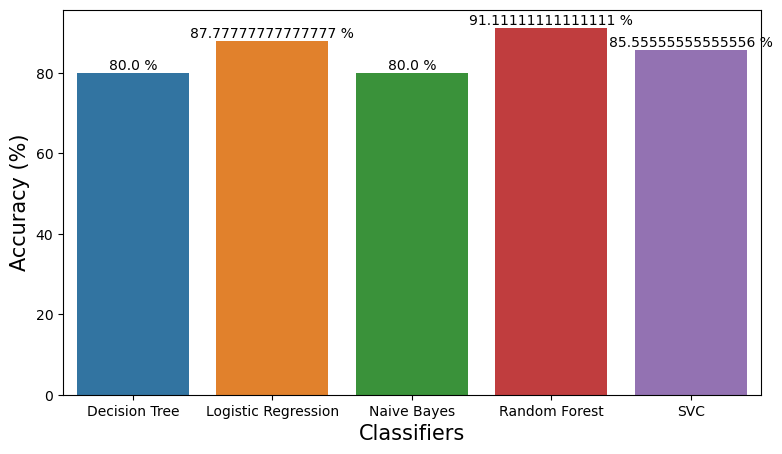

In [49]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x=ModelsList, y=accuracyList)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()